In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('IMDB_Movies.csv')

In [29]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [30]:
df.shape

(5043, 28)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [32]:
df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          955
language                       46
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [33]:
df.duplicated().sum()

45

In [34]:
df[df.duplicated(keep = 'first')|df.duplicated(keep = False)]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
63,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
98,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
100,Color,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,...,988,English,USA,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,Color,Jason Stone,48.0,108.0,14.0,826.0,Ellen Burstyn,2000.0,NaN,Thriller,...,28,English,USA,R,NaN,2014.0,1000.0,5.8,NaN,0
4942,Color,Paul Schrader,130.0,93.0,261.0,697.0,Ruby Dee,783.0,NaN,Fantasy|Horror|Thriller,...,106,English,USA,R,18000000.0,1982.0,782.0,6.1,1.85,0
4949,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,46,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
4950,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,46,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377


In [35]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [36]:
df.drop_duplicates(subset=['movie_title'],inplace=True)

In [37]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [38]:
df.shape

(4917, 28)

In [39]:
df.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          20
language                      14
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [40]:
df.drop(columns=['color','director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes','cast_total_facebook_likes', 
        'facenumber_in_poster','movie_imdb_link','actor_2_facebook_likes','content_rating','plot_keywords'],
        axis = 1,
        inplace = True)

In [41]:
df.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,country,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054,English,USA,237000000.0,2009.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238,English,USA,300000000.0,2007.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994,English,UK,245000000.0,2015.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701,English,USA,250000000.0,2012.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,,NaN,NaN,NaN,NaN,7.1,NaN,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4917 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           4815 non-null   object 
 1   num_critic_for_reviews  4868 non-null   float64
 2   duration                4902 non-null   float64
 3   actor_2_name            4904 non-null   object 
 4   gross                   4054 non-null   float64
 5   genres                  4917 non-null   object 
 6   actor_1_name            4910 non-null   object 
 7   movie_title             4917 non-null   object 
 8   num_voted_users         4917 non-null   int64  
 9   actor_3_name            4894 non-null   object 
 10  num_user_for_reviews    4897 non-null   object 
 11  language                4903 non-null   object 
 12  country                 4912 non-null   object 
 13  budget                  4433 non-null   float64
 14  title_year              4811 non-null   float

In [43]:
df['Profit'] = df['gross'] - df['budget']

In [44]:
df.sample(10)

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,country,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Profit
3061,Daisy von Scherler Mayer,70.0,94.0,Dash Mihok,3034181.0,Comedy|Music|Romance,Michael McKean,The Guru,13622,Jimi Mistry,128,English,UK,11000000.0,2002.0,5.4,1.85,550,-7965819.0
3376,NaN,9.0,60.0,Philip Winchester,NaN,Action|Crime|Drama|Thriller,Nick Wechsler,The Player,5817,Jeff Marlow,25,English,USA,NaN,NaN,7.1,16.00,0,NaN
4391,Dave Meyers,16.0,84.0,Clifton Powell,6026908.0,Comedy|Drama,Eddie Griffin,Foolish,536,Marla Gibbs,13,English,USA,2000000.0,1999.0,4.3,NaN,43,4026908.0
4956,Travis Cluff,159.0,81.0,Cassidy Gifford,22757819.0,Horror|Thriller,Pfeifer Brown,The Gallows,13521,Reese Mishler,150,English,USA,100000.0,2015.0,4.2,1.85,0,22657819.0
4430,Mark Brown,14.0,90.0,Monica Calhoun,92362.0,Comedy|Drama,Vivica A. Fox,The Salon,444,Garrett Morris,5,English,USA,1500000.0,2005.0,4.3,1.85,68,-1407638.0
4191,Éric Tessier,9.0,99.0,Michel Côté,NaN,Action|Drama|Horror|Thriller,Patrick Huard,Sur le seuil,1003,Jean Pierre Bergeron,5,French,Canada,3200000.0,2003.0,6.6,1.85,39,NaN
3369,Masayuki Ochiai,135.0,90.0,David Denman,25926543.0,Horror|Mystery|Thriller,James Kyson,Shutter,26609,Daisy Betts,148,English,USA,8000000.0,2008.0,5.2,1.85,0,17926543.0
2496,Joe Carnahan,186.0,109.0,Common,35635046.0,Action|Crime|Drama|Thriller,Ryan Reynolds,Smokin' Aces,121058,Alex Rocco,482,English,UK,17000000.0,2006.0,6.7,2.35,3000,18635046.0
968,D.J. Caruso,288.0,109.0,Emily Wickersham,55092830.0,Action|Adventure|Sci-Fi|Thriller,Alex Pettyfer,I Am Number Four,195043,Reuben Langdon,329,English,USA,60000000.0,2011.0,6.1,1.85,27000,-4907170.0
806,Frank Miller,223.0,103.0,Jaime King,19781879.0,Action|Crime|Fantasy|Thriller,Scarlett Johansson,The Spirit,53864,Louis Lombardi,290,English,USA,60000000.0,2008.0,4.8,2.35,2000,-40218121.0


# Movies with Highest Profit

In [45]:
df.sort_values('Profit',ascending= False)[['movie_title','Profit']].head(10)

,movie_title,Profit
0,Avatar,523505847.0
29,Jurassic World,502177271.0
26,Titanic,458672302.0
3024,Star Wars: Episode IV - A New Hope,449935665.0
3080,E.T. the Extra-Terrestrial,424449459.0
17,The Avengers,403279547.0
509,The Lion King,377783777.0
240,Star Wars: Episode I - The Phantom Menace,359544677.0
66,The Dark Knight,348316061.0
439,The Hunger Games,329999255.0


Text(0.5, 1.0, 'Profit V/s Budget')

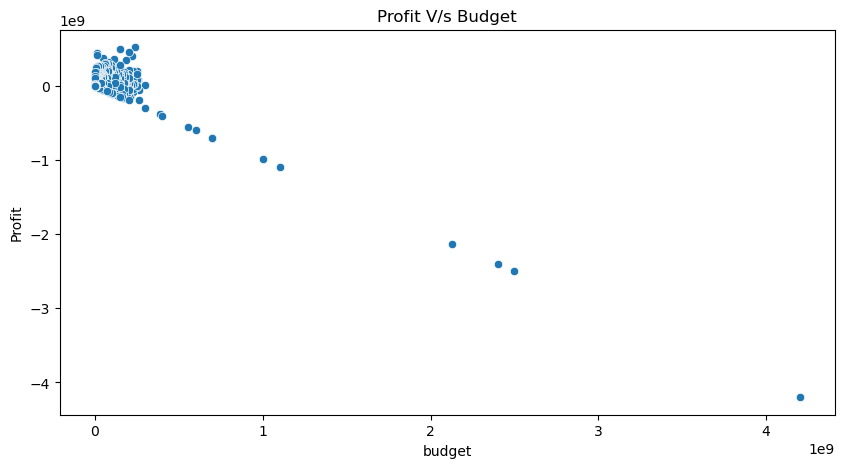

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['budget'], y = df['Profit'],data = df)
plt.title('Profit V/s Budget')

Text(0.5, 1.0, 'Profit V/s Gross')

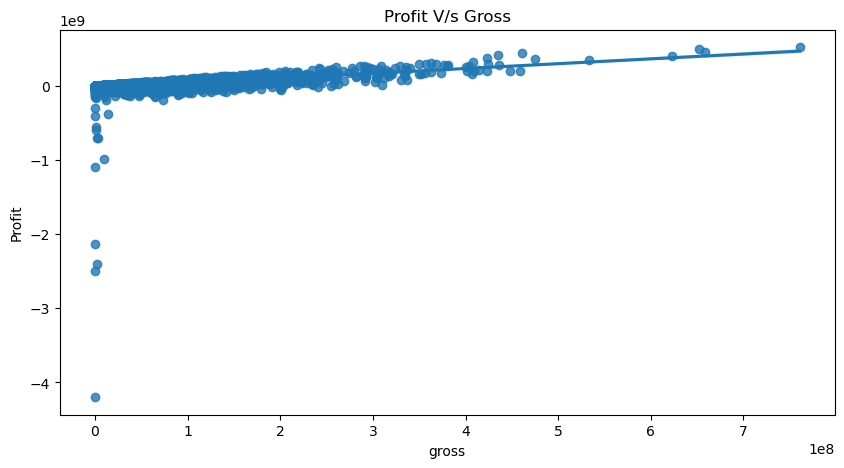

In [47]:
plt.figure(figsize=(10,5))
sns.regplot(x = df['gross'], y = df['Profit'],data = df)
plt.title('Profit V/s Gross')

# Top 250 movies with Highest IMDB Score

In [58]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'country', 'budget',
       'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'Profit', 'Decade'],
      dtype='object')

In [50]:
df.sort_values('imdb_score',ascending=False)[['movie_title','imdb_score']].head(250)

,movie_title,imdb_score
2765,Towering Inferno,9.5
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
4409,Kickboxer: Vengeance,9.1
2824,Dekalog,9.1
...,...,...
1181,The Sixth Sense,8.1
3854,Donnie Darko,8.1
128,Mad Max: Fury Road,8.1
1604,Million Dollar Baby,8.1


# Best Director based on IMDB Score

In [51]:
df.groupby('director_name')['imdb_score'].mean().nlargest(10)

director_name
John Blanchard      9.5
Cary Bell           8.7
Mitchell Altieri    8.7
Sadyk Sher-Niyaz    8.7
Charles Chaplin     8.6
Mike Mayhall        8.6
Damien Chazelle     8.5
Majid Majidi        8.5
Raja Menon          8.5
Ron Fricke          8.5
Name: imdb_score, dtype: float64

# Popular Genres

In [52]:
df.groupby('genres')['imdb_score'].mean().nlargest(20)

genres
Action|Adventure|Crime|Drama|Sci-Fi|Thriller       8.80
Action|Adventure|Biography|Drama|History           8.60
Action|Drama|History|Thriller|War                  8.50
Adventure|Animation|Drama|Family|Musical           8.50
Crime|Drama|Fantasy|Mystery                        8.50
Action|Adventure|Drama|Fantasy|War                 8.40
Action|Animation|Crime|Sci-Fi|Thriller             8.40
Adventure|Drama|Thriller|War                       8.40
Comedy|Drama|History|Romance                       8.40
Adventure|Animation|Comedy|Drama|Family|Fantasy    8.30
Adventure|Drama|Fantasy|Mystery                    8.30
Adventure|Drama|History|Thriller|War               8.30
Biography|Drama|History|Music                      8.30
Comedy|Mystery|Thriller                            8.30
Documentary|Drama|Sport                            8.30
Adventure|Drama|War                                8.25
Action|Adventure|Drama|Horror|Sci-Fi               8.20
Biography|Crime|Documentary|History      

In [53]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'country', 'budget',
       'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'Profit'],
      dtype='object')

In [54]:
def user_voted(num_voted_users):
    if num_voted_users > 1920 and  num_voted_users <= 1930:
        return "1920 - 1930"
    elif num_voted_users > 1930 and  num_voted_users <= 1940:
        return "1930 - 1940"
    elif num_voted_users > 1940 and  num_voted_users <= 1950:
        return "1940 - 1950"
    elif num_voted_users > 1950 and  num_voted_users <= 1960:
        return "1950 - 1960"
    elif num_voted_users > 1960 and  num_voted_users <= 1970:
        return "1960 - 1970"
    elif num_voted_users > 1970 and  num_voted_users <= 1980:
        return "1970 - 1980"
    elif num_voted_users > 1980 and  num_voted_users <= 1990:
        return "1980 - 1990"
    elif num_voted_users > 1990 and  num_voted_users <= 2000:
        return "1990 - 2000"
    elif num_voted_users > 2000 and  num_voted_users <= 2010:
        return "2000 - 2010"
    elif num_voted_users > 2010 and  num_voted_users <= 2020:
        return "2010 - 2020"

In [55]:
df['Decade'] = df['title_year'].apply(user_voted) 

In [56]:
df.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,country,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Decade
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054,English,USA,237000000.0,2009.0,7.9,1.78,33000,523505847.0,2000 - 2010
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238,English,USA,300000000.0,2007.0,7.1,2.35,0,9404152.0,2000 - 2010
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994,English,UK,245000000.0,2015.0,6.8,2.35,85000,-44925825.0,2010 - 2020
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701,English,USA,250000000.0,2012.0,8.5,2.35,164000,198130642.0,2010 - 2020
4,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,,NaN,NaN,NaN,NaN,7.1,NaN,0,NaN,None


In [57]:
df.groupby('Decade')['title_year'].count()

Decade
1920 - 1930       5
1930 - 1940      19
1940 - 1950      21
1950 - 1960      29
1960 - 1970      80
1970 - 1980     120
1980 - 1990     283
1990 - 2000     920
2000 - 2010    2111
2010 - 2020    1221
Name: title_year, dtype: int64